# ML3: Decision Tree Classification

By: Chris

## Importing the libraries

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns


## Importing the dataset

In [157]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

## Clean Dataset

In [169]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

## K-Nearest Neighbors Classification

In [160]:
# split dataset in two parts: feature set and target label 
feature_set = ['Gender_Code', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',	'Profession_Code', 'Work Experience', 'Family Size']
features = df[feature_set] 
target = df['Spending Score (1-100)']

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

In [161]:
# one-hot encoding the categorical variables
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(df[['Gender', 'Profession']]).toarray()
X = np.concatenate((df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].values, X_cat), axis=1)
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [162]:
print(X_train)

[[-0.32254287  1.48279308  1.42996757 ... -0.18786729 -0.27894408
  -0.22321416]
 [ 0.42324404  0.6442794  -0.03650889 ... -0.18786729 -0.27894408
  -0.22321416]
 [-0.81973414  1.51647774 -1.07377274 ... -0.18786729 -0.27894408
  -0.22321416]
 ...
 [ 1.13351729  1.31011578  0.1423297  ... -0.18786729 -0.27894408
  -0.22321416]
 [-1.74308936  0.69584819 -0.93070186 ... -0.18786729 -0.27894408
  -0.22321416]
 [-1.28141175  1.00098521  0.53577461 ... -0.18786729 -0.27894408
  -0.22321416]]


In [163]:
print(X_test)

[[-1.10384344 -0.15052236 -0.53725696 ... -0.18786729 -0.27894408
  -0.22321416]
 [ 1.24005828  1.33896044  1.14382582 ... -0.18786729 -0.27894408
  -0.22321416]
 [ 1.41762659  0.57658451 -0.64456011 ... -0.18786729 -0.27894408
  -0.22321416]
 ...
 [ 1.77276321  0.86709302 -1.18107589 ... -0.18786729 -0.27894408
  -0.22321416]
 [ 0.17464841 -0.67078977 -0.75186327 ... -0.18786729 -0.27894408
  -0.22321416]
 [-0.96178879  0.34100892 -0.21534749 ...  5.32290647 -0.27894408
  -0.22321416]]


## Training the Decision Tree Classification model on the Training set

In [164]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [165]:
# Define the input features for prediction
input_data = np.array([[30, 87000, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Scale the input features using the trained StandardScaler
scaled_data = sc.transform(input_data)

# Make a prediction using the trained DecisionTreeClassifier
prediction = classifier.predict(scaled_data)

print(prediction)


[6]


## Predicting the Test set results

In [166]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [0 0]
 [1 1]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [4 4]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [3 3]
 [0 0]
 [0 0]
 [5 5]
 [5 5]
 [2 2]
 [2 2]
 [5 5]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [5 5]
 [4 4]
 [3 3]
 [4 4]
 [0 0]
 [7 7]
 [8 8]
 [5 5]
 [4 4]
 [5 5]
 [3 3]
 [2 2]
 [5 5]
 [4 4]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [5 5]
 [0 0]
 [5 5]
 [3 3]
 [3 3]
 [5 5]
 [5 5]
 [4 4]
 [4 4]
 [0 0]
 [5 5]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [5 5]
 [4 4]
 [3 3]
 [5 5]
 [0 0]
 [0 0]
 [5 5]
 [4 4]
 [0 0]
 [7 7]
 [2 2]
 [1 1]
 [7 7]
 [0 0]
 [2 2]
 [0 0]
 [7 7]
 [7 7]
 [0 0]
 [0 0]
 [5 5]
 [3 3]
 [2 2]
 [5 5]
 [2 2]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 4]
 [1 1]
 [4 4]
 [0 0]
 [5 5]
 [3 3]
 [0 0]
 [3 3]
 [5 5]
 [0 0]
 [0 0]
 [4 4]
 [1 1]
 [5 5]
 [3 3]
 [0 0]
 [4 4]
 [0 0]
 [7 7]
 [0 0]
 [0 0]
 [5 5]
 [2 2]
 [5 5]
 [3 3]
 [7 7]
 [7 7]
 [5 5]
 [3 3]
 [0 0]
 [3 3]
 [8 8]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [6 6]
 [0 0]
 [0 0]
 [5 5]
 [7 7]
 [0 0]

## Making the Confusion Matrix

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[158   0   0   0   0   0   0   0   0]
 [  0  48   0   0   0   0   0   0   0]
 [  0   0  43   0   0   0   0   0   0]
 [  0   0   0  66   0   0   0   0   0]
 [  0   0   0   0  44   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0]
 [  0   0   0   0   0   0   9   0   0]
 [  0   0   0   0   0   0   0  33   0]
 [  0   0   0   0   0   0   0   0  14]]


1.0

## Visualize the Decision Tree Classifieer

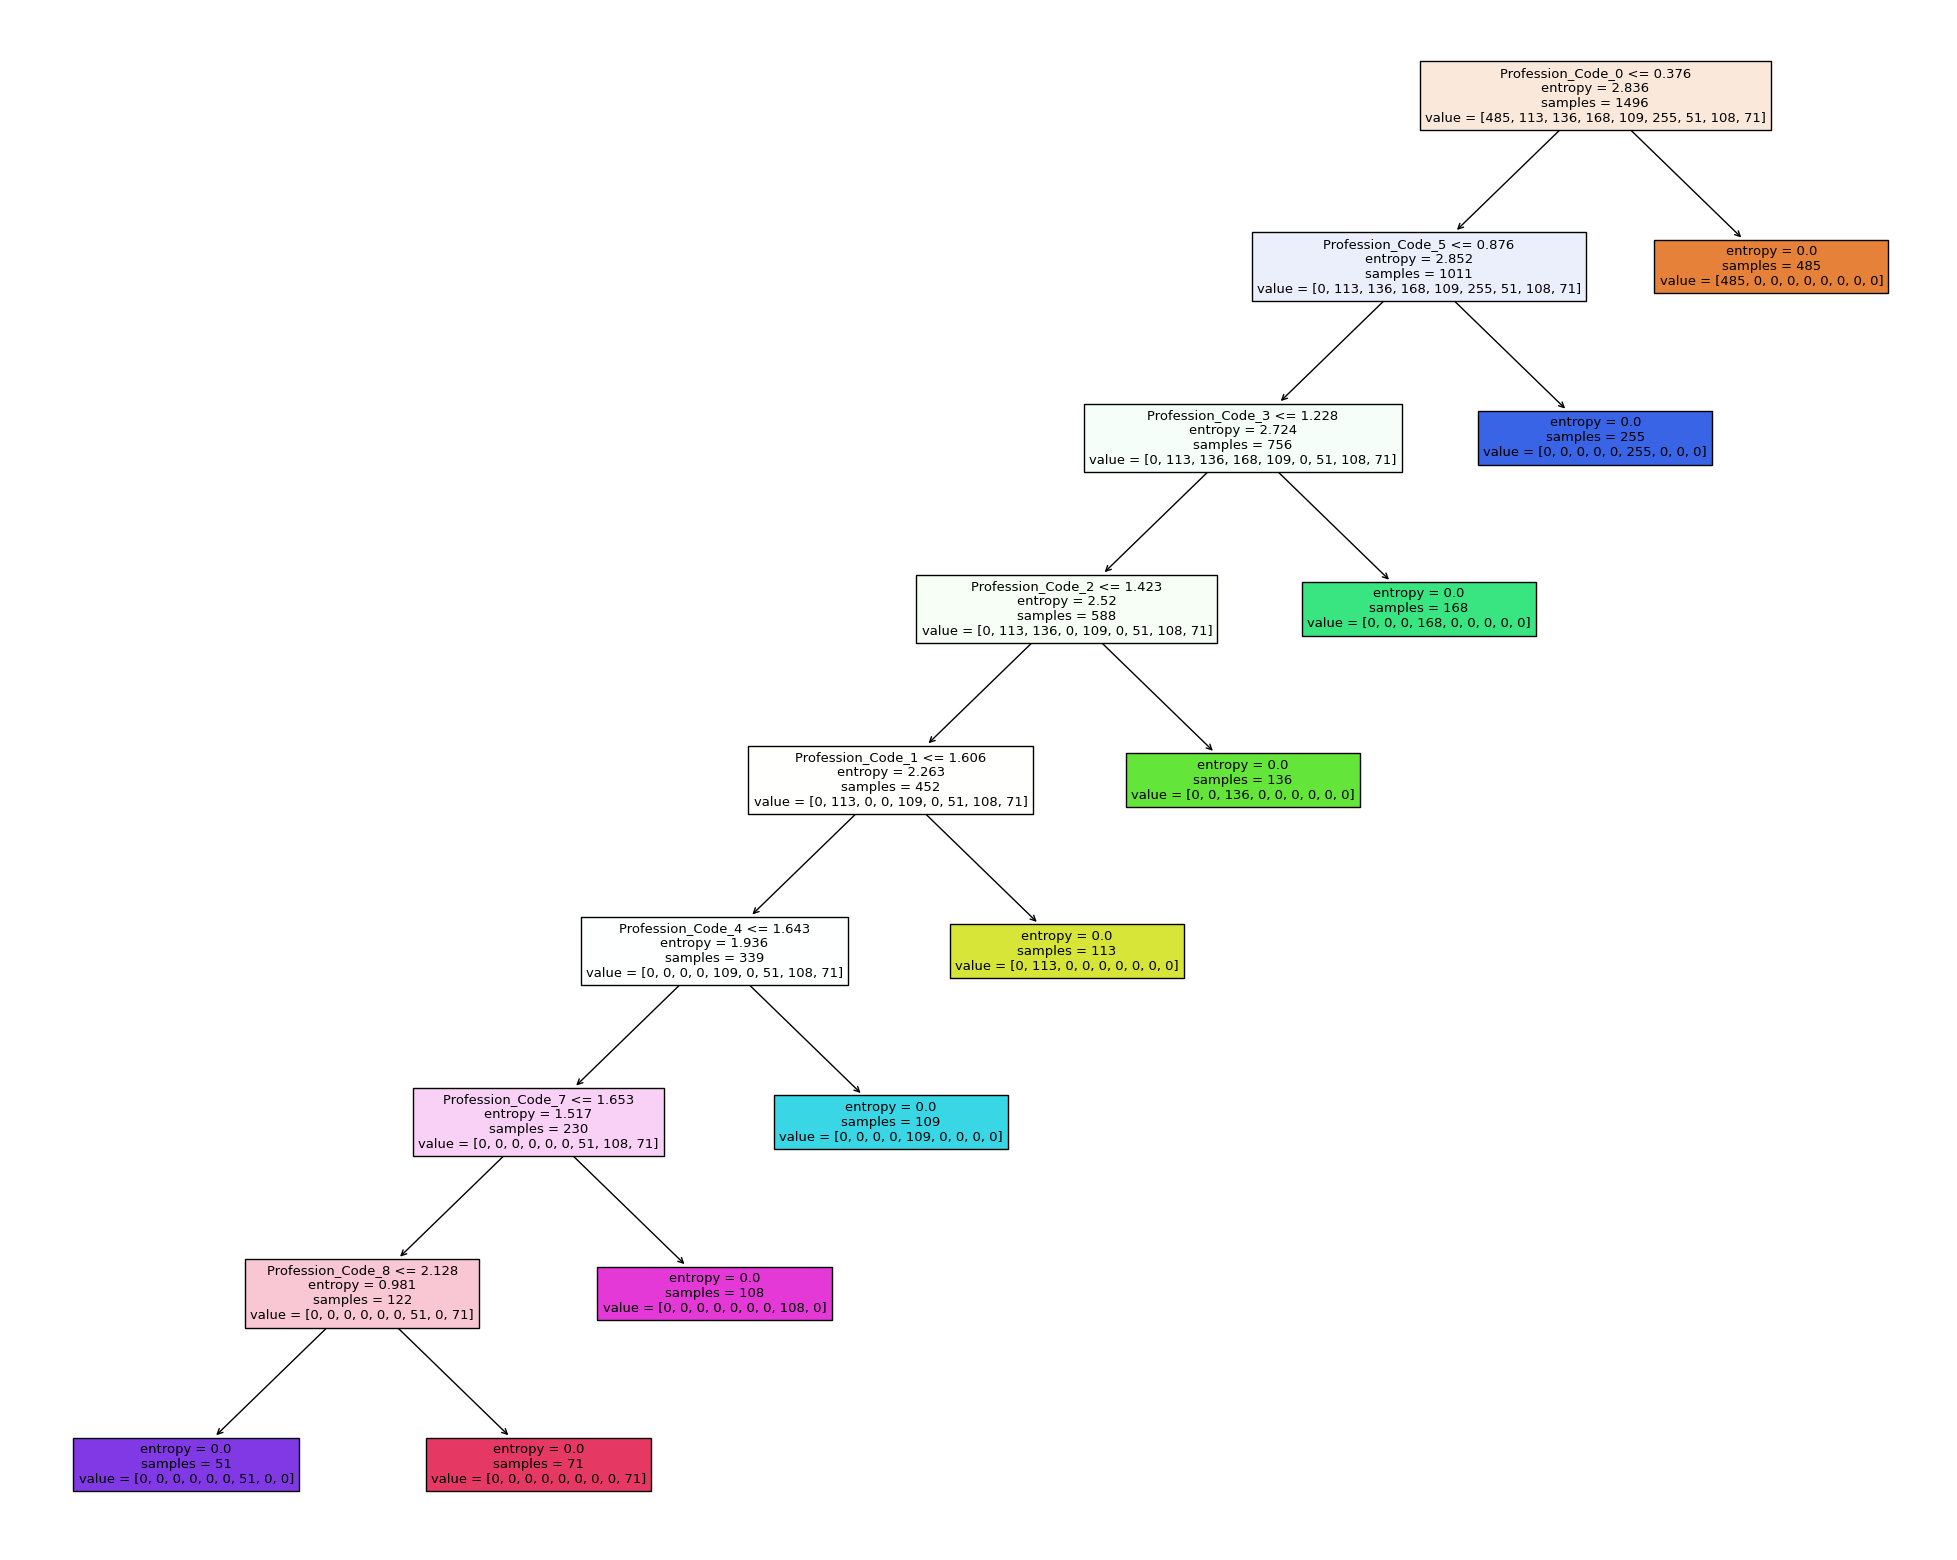

In [149]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names = ['Age' , 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Gender_Code_0', 'Gender_Code_1', 'Profession_Code_0', 'Profession_Code_1', 'Profession_Code_2', 'Profession_Code_3', 'Profession_Code_4', 'Profession_Code_5', 'Profession_Code_6', 'Profession_Code_7', 'Profession_Code_8', 'Profession_Code_9', 'Profession_Code_10', 'Profession_Code_11', 'Profession_Code_12', 'Profession_Code_13', 'Profession_Code_14'],
                   filled=True)
